# Are Certain Communities Let Off Easier in Minnesota Courts?
## Analyzing differences in sentences pronounced to different communities, plus other interesting data we found
### Michigan State University
#### Authors: Anshul Srivastava and Aditya Pendyala
##### Date: November 5, 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import seaborn as sns

# Finding Data
<p> We began by looking for relavant data and decided to use the data provided by Minnesota Sentencing Guidelines Commission (MGSC). It contains information about the offender (race/sex/age), the type of offense(s), and the length of the sentence they received.</p>

Source: https://drive.google.com/drive/folders/10rinaSHj37-0vnnEgjs_9pKKLDHUDPcS/

In [2]:
sentencing = pd.read_csv('allmn.csv');

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
x = pd.read_csv('allmn.csv', usecols=['sentyear','district', 'county', 'sex','race','Agecat', 'statmax','offtype',
                                         'time', 'confine','plea', 'totinc', 'aggsentc','consec', 'condconf']) 
x['jailtime'] = np.round((x['confine']+(x['condconf']/30)),2)
x1 = x[x['plea']==1]
x2 = x[x['plea']==2]
filtered_df = x1.reset_index()
filtered_df_notg = x2.reset_index()

In [4]:
filtered_df

,index,sentyear,district,county,sex,race,Agecat,offtype,statmax,time,plea,confine,totinc,condconf,consec,aggsentc,jailtime
0,0,2019,5,42,1,2,3,7,5.0,12.03,1,0.00,100,4.0,0,0.00,0.13
1,1,2019,10,2,1,2,5,1,5.0,12.03,1,12.03,100,4.0,0,12.03,12.16
2,2,2019,10,2,1,1,3,1,5.0,12.03,1,12.00,100,3.0,0,12.00,12.10
3,3,2019,7,3,1,1,5,1,5.0,12.03,1,0.00,100,104.0,0,0.00,3.47
4,4,2019,9,4,1,1,5,1,5.0,12.03,1,0.00,100,22.0,0,0.00,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284842,294461,2001,2,62,1,2,4,3,30.0,134.00,1,89.33,100,0.0,0,89.33,89.33
284843,294463,2001,6,69,1,1,4,3,30.0,134.00,1,86.00,100,9.0,100,86.00,86.30
284844,294464,2001,10,86,1,2,4,3,30.0,134.00,1,98.00,100,0.0,0,98.00,98.00
284845,294465,2001,6,69,1,1,3,3,30.0,158.00,1,94.00,100,0.0,0,94.00,94.00


## 1. Jail Demographic
<p> To put the rest of this project into perspective, we decided to show and compare the demographics of the state of Minnesota vs. the demographics of the jails of Minnesota. 
<p> We saw that while African-Americans made 7.4% of the population of the state, they made up 25.7% of the prison population. Compare that to the white community - they make 83% of the state, and 59% of the prisons.
<p> This data suggests a disproportionate rate of incarceration towards a particular community.
 
   Source: https://www.census.gov/quickfacts/MN/

In [64]:
share = np.array([len(filtered_df[filtered_df['race']==1]),
          len(filtered_df[filtered_df['race']==2]),
          len(filtered_df[filtered_df['race']==3]),
          len(filtered_df[filtered_df['race']==4]),
          len(filtered_df[filtered_df['race']==5])])

In [66]:
share_exp = [0.83, 0.074, 0.014, 0.058, 0.054]

In [7]:
o1 = filtered_df[filtered_df['offtype']==1]
o2 = filtered_df[filtered_df['offtype']==2]
o3 = filtered_df[filtered_df['offtype']==3]
o4 = filtered_df[filtered_df['offtype']==4]
o5 = filtered_df[filtered_df['offtype']==5]
o6 = filtered_df[filtered_df['offtype']==6]
o7 = filtered_df[filtered_df['offtype']==7]
o8 = filtered_df[filtered_df['offtype']==8]

In [8]:
# average_sentence1 = [np.mean(o1['jailtime'][o1['race']==1]),np.mean(o1['jailtime'][o1['race']==2]),
#                      np.mean(o1['jailtime'][o1['race']==3]),np.mean(o1['jailtime'][o1['race']==4]),
#                      np.mean(o1['jailtime'][o1['race']==5])]
average_sentence1 = [np.mean(o1['jailtime'][o1['race']==i]) for i in range(1,6)]
average_sentence2 = [np.mean(o2['jailtime'][o2['race']==i]) for i in range(1,6)] 
average_sentence3 = [np.mean(o3['jailtime'][o3['race']==i]) for i in range(1,6)] 
average_sentence5 = [np.mean(o5['jailtime'][o5['race']==i]) for i in range(1,6)] 
average_sentence6 = [np.mean(o6['jailtime'][o6['race']==i]) for i in range(1,6)] 
average_sentence7 = [np.mean(o7['jailtime'][o7['race']==i]) for i in range(1,6)] 
average_sentence8 = [np.mean(o8['jailtime'][o8['race']==i]) for i in range(1,6)] 


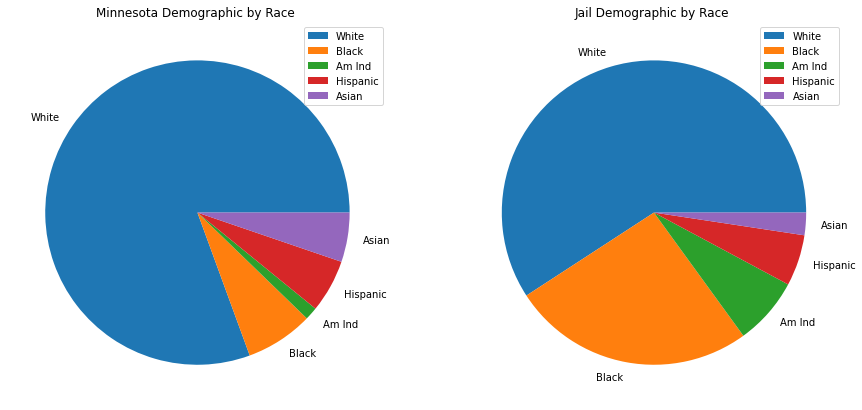

In [58]:
plt.figure(figsize=(15,15))
plt.subplot(122)
plt.title("Jail Demographic by Race ")
plt.pie(share, labels = ['White',"Black", "Am Ind", "Hispanic", "Asian"])
plt.legend();

plt.subplot(121)
plt.title("Minnesota Demographic by Race ")
plt.pie(share_exp, labels = ['White',"Black", "Am Ind", "Hispanic", "Asian"])
plt.legend();
plt.savefig('jail_demo.png')

# Average Sentence Period By Offence (by Race)
Next, we decided to compare the sentence period each community recieved, to find and point out any other racial disparities in the policing and judicial system of Minnesota. We began by grouping our data on the basis of offense type. We then calculated the average sentence received for that particular offense, grouped by race.
<p> Again, the obvious result we see from the graphs is that white offenders get a lower sentence on average, no matter the type of offense. We see the most prejudice in drug-related crimes, where Hispanics get the highest sentences on average.

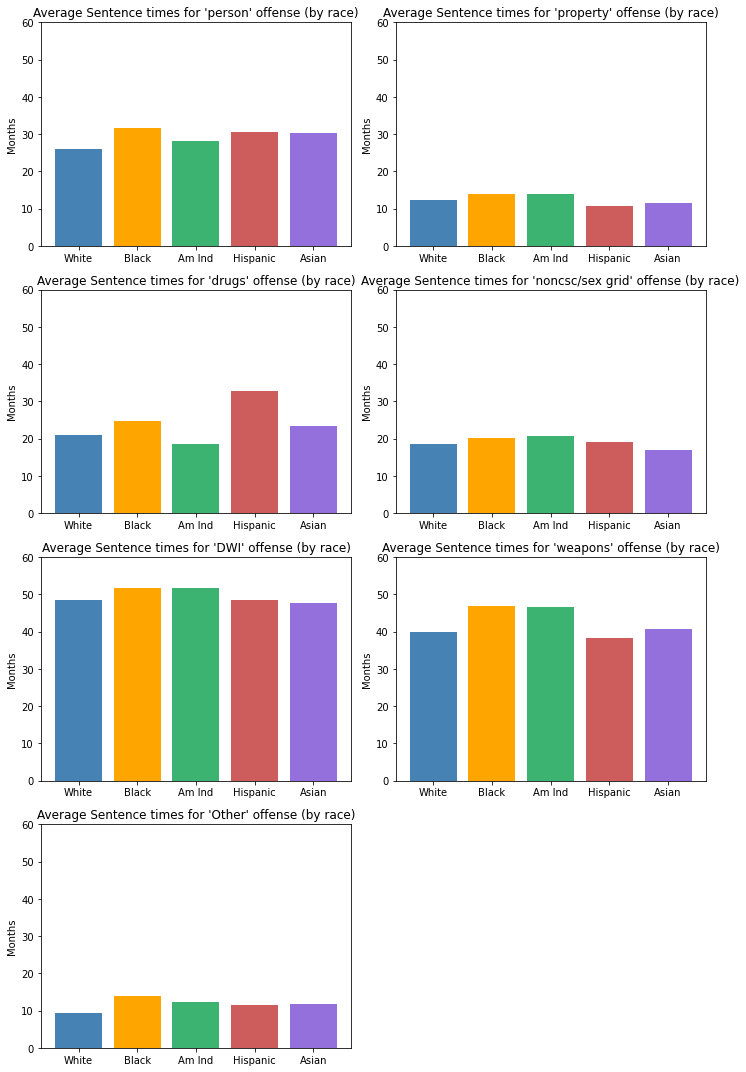

In [67]:
plt.figure(figsize=(10,15))
plt.subplot(421)
plt.title("Average Sentence times for 'person' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence1, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');


plt.subplot(422)
plt.title("Average Sentence times for 'property' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence2, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(423)
plt.title("Average Sentence times for 'drugs' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence3, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(424)
plt.title("Average Sentence times for 'noncsc/sex grid' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence5, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(425)
plt.title("Average Sentence times for 'DWI' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence6, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(426)
plt.title("Average Sentence times for 'weapons' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence7, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(427)
plt.title("Average Sentence times for 'Other' offense (by race)")
plt.bar(['White',"Black", "Am Ind", "Hispanic", "Asian"], average_sentence8, color =['steelblue', 'orange', 'mediumseagreen', 'indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');
plt.tight_layout()
plt.savefig('avg_by_race.png')

# Average Sentence Period By Offence (by Sex)
Further investigation included repeating the same prcedure as above, but this time we grouped the avergae sentences by sex, instead of race. We saw that females, on average, will receive lower sentences for committing the same crimes. While we are unsure of all the factors that go into this result, we thought it was interesting to point out.

In [11]:
s_average_sentence1 = [np.mean(o1['jailtime'][o1['sex']==i]) for i in range(1,3)]
s_average_sentence2 = [np.mean(o2['jailtime'][o2['sex']==i]) for i in range(1,3)]
s_average_sentence3 = [np.mean(o3['jailtime'][o3['sex']==i]) for i in range(1,3)]
s_average_sentence5 = [np.mean(o5['jailtime'][o5['sex']==i]) for i in range(1,3)]
s_average_sentence6 = [np.mean(o6['jailtime'][o6['sex']==i]) for i in range(1,3)]
s_average_sentence7 = [np.mean(o7['jailtime'][o7['sex']==i]) for i in range(1,3)]
s_average_sentence8 = [np.mean(o8['jailtime'][o8['sex']==i]) for i in range(1,3)]

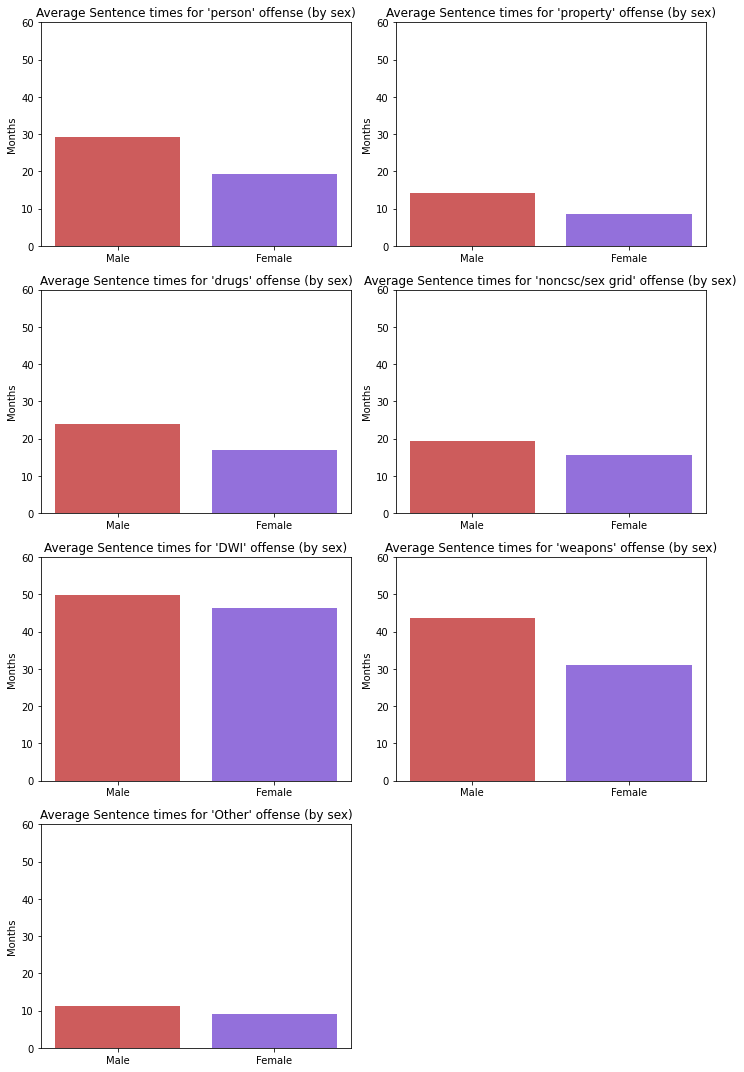

In [68]:
plt.figure(figsize=(10,15))
plt.subplot(421)
plt.title("Average Sentence times for 'person' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence1, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');


plt.subplot(422)
plt.title("Average Sentence times for 'property' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence2, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(423)
plt.title("Average Sentence times for 'drugs' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence3, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(424)
plt.title("Average Sentence times for 'noncsc/sex grid' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence5, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(425)
plt.title("Average Sentence times for 'DWI' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence6, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(426)
plt.title("Average Sentence times for 'weapons' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence7, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');

plt.subplot(427)
plt.title("Average Sentence times for 'Other' offense (by sex)")
plt.bar(['Male', 'Female'], s_average_sentence8, color =['indianred', 'mediumpurple'])
plt.ylim(0, 60)
plt.ylabel('Months');
plt.tight_layout()
plt.savefig('avg_by_sex.png')

# Effect of Plea on Sentence Period
For our final criteria we investigated, we tried to analyze the results of the defendant's plea on their sentence. We are aware of the fact that judges and juries usually give lower sentences to defendants who plead guilty before the court proceeds. We just wanted to visualize just how much of a difference that makes. 
<p> While our findings are consistent with that fact, the interesting thing is by how much the sentence increases for assault and drug related crimes. Assaults crime sentences have an increase of <b>174%</b> if the defendant pleads not guilty, while drug sentences increase by <b>113%</b>.

In [73]:
ngo1 = filtered_df_notg[filtered_df_notg['offtype']==1]
ngo2 = filtered_df_notg[filtered_df_notg['offtype']==2]
ngo3 = filtered_df_notg[filtered_df_notg['offtype']==3]
ngo4 = filtered_df_notg[filtered_df_notg['offtype']==4]
ngo5 = filtered_df_notg[filtered_df_notg['offtype']==5]
ngo6 = filtered_df_notg[filtered_df_notg['offtype']==6]
ngo7 = filtered_df_notg[filtered_df_notg['offtype']==7]
ngo8 = filtered_df_notg[filtered_df_notg['offtype']==8]

gaverage_sentence = np.array([np.mean(o1['jailtime']),np.mean(o2['jailtime']), np.mean(o3['jailtime']), 
                    np.mean(o5['jailtime']), np.mean(o6['jailtime']), np.mean(o7['jailtime']),
                    np.mean(o8['jailtime'])])

ngaverage_sentence = np.array([np.mean(ngo1['jailtime']), np.mean(ngo2['jailtime']), np.mean(ngo3['jailtime'])
                      ,np.mean(ngo5['jailtime']), np.mean(ngo6['jailtime']), np.mean(ngo7['jailtime']),
                      np.mean(ngo8['jailtime'])])


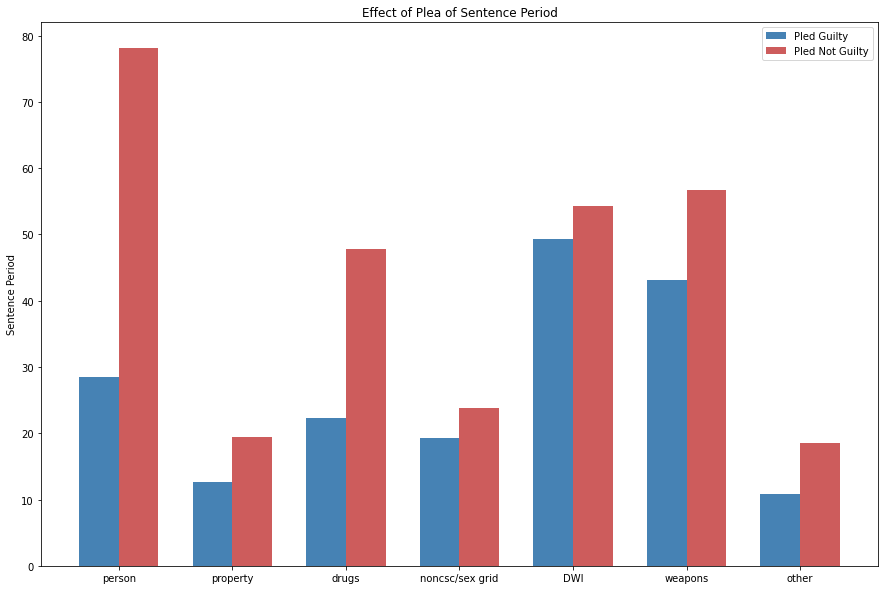

<Figure size 432x288 with 0 Axes>

In [61]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['person', 'property', 'drugs','noncsc/sex grid','DWI', 'weapons', 'other']


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(15,10))

plt.bar(x - width/2, gaverage_sentence, width, label='Pled Guilty', color='steelblue')
plt.bar(x + width/2, ngaverage_sentence, width, label='Pled Not Guilty', color='indianred')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Sentence Period')
plt.title('Effect of Plea of Sentence Period')
plt.xticks(x, labels)
plt.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig('plea.png')